### Load keras and define parameters

In [1]:
import os; os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # Disable warinings
from tensorflow import keras
from matplotlib import pyplot as plt

2024-11-29 13:10:17.237257: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732885817.404921      34 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732885817.461591      34 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
batch_size = 128
layer_size = 256
number_of_layers = 2

### Load the mnist data set

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
print(f'The shape of the training data is {X_train.shape}')
print(f'The dimensions of each image is {X_train.shape[1:]}')
print(f'The train set contains {len(X_train)} images')
print(f'The test set contains {len(X_test)} images')

The shape of the training data is (60000, 28, 28)
The dimensions of each image is (28, 28)
The train set contains 60000 images
The test set contains 10000 images


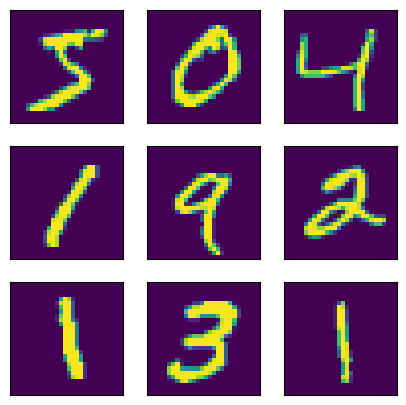

In [5]:
#
fig, axes = plt.subplots(3, 3, figsize=(5,5))
for i, ax in enumerate(axes.flat):
    ax.axes.yaxis.set_ticks([])
    ax.axes.xaxis.set_ticks([])
    ax.imshow(X_train[i])

In [6]:
print(y_train[:9])

[5 0 4 1 9 2 1 3 1]


### Build and train the model

In [7]:
# Create a simple classifier
model = keras.Sequential([
    *[keras.layers.Dense(layer_size, activation="relu") for _ in range(number_of_layers)],
    keras.layers.Dense(10, activation="softmax") # exp(y_i)/(sum(exp(y))
])

In [8]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

W0000 00:00:1732885834.415891      34 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [9]:
# Prep the data
X_train = X_train.reshape((60000, 28*28)).astype("float32") / 255
X_test = X_test.reshape((10000, 28*28)).astype("float32") / 255

In [ ]:
X_test.shape

In [ ]:
model.fit(X_train, y_train, epochs=5, batch_size=batch_size)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print(f'Predictions: {list(map(lambda z: z.argmax(), y_pred[:9]))}')
print(f'True Values: {list(y_test[:9])}')

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'The test loss is: {test_loss}')
print(f'The test accuracy is: {test_acc}')

### Overfit (just for fun)

In [ ]:
model.fit(X_train, y_train, epochs=15, batch_size=batch_size)

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'The test loss is: {test_loss}')
print(f'The test accuracy is: {test_acc}')